In [2]:
import numpy as np
from pysat.solvers import Glucose3
from collections import defaultdict
import time
import os
import torch
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


In [162]:
def check_mkdir(dir_name):
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)
        
def get_data(folder_path='outputs20220531_new', nums = [22, 24, 26, 28, 30, 32], data_type="H"):
    data = []
    data_paths = [os.path.join(folder_path, str(i)+"_"+data_type+".pt") for i in nums]
    for path in data_paths:
        if os.path.isfile(path): 
            # print(path)
            one_data = torch.load(path)
            data.extend(one_data)
            # print(len(one_data))
            
    num_nodes = np.array([ele[0] for ele in data], dtype=np.int64)
    num_edges = np.array([ele[1] for ele in data], dtype=np.int64)
    num_max_dofds = np.array([ele[3] for ele in data], dtype=np.int64)
    num_ave_dofds = np.array([ele[3] for ele in data], dtype=np.int64)
    
    num_clauses = np.array([ele[-2] for ele in data])
    run_times = np.array([ele[-1] for ele in data])
    return [num_nodes, num_edges, num_max_dofds, num_ave_dofds, num_clauses, run_times]
# datas = get_data()

def draw_fig(num_nodes, run_times, x_type="number of nodes", y_type="averaged running time",data_type="H", output_img_path=None):
    num_nodes1 = np.unique(num_nodes, return_counts=True)[0]
    num_nodes2 = np.unique(num_nodes, return_counts=True)[1]
    # ave_run_times = [sum(run_times[num_nodes==ele1])/(ele2+1e-8) for ele1,ele2  in zip(num_nodes1, num_nodes2)]
    ave_run_times, std_run_times = [], []
    for ele1, ele2 in zip(num_nodes1, num_nodes2):
        vals = run_times[num_nodes == ele1]
        aveT = sum(vals)/(ele2 + 1e-8)
        stdT = np.sqrt(sum((vals - aveT)*(vals - aveT))/(len(vals)+1e-8))
        
        # if ele1 == 30:
        #     print(vals)
        #     print(aveT)
        #     print(stdT)
        # break
        ave_run_times.append(aveT)
        std_run_times.append(stdT)
    # print(num_nodes)
    ave_run_times = np.array(ave_run_times)
    std_run_times = np.array(std_run_times)
    # print(ave_run_times)
    # print(std_run_times)
    # print(num_nodes1)
    plt.plot(num_nodes1, ave_run_times, color='blue', alpha=1.0)
    plt.fill_between(num_nodes1, ave_run_times+std_run_times, ave_run_times-std_run_times, facecolor='blue', alpha=0.3)
    plt.title("{} vs {} in {} graph".format(x_type, y_type, data_type))
    plt.xlabel(x_type)
    plt.ylabel(y_type)
    # plt.xaxis.set_major_locator(MaxNLocator(integer=True))
    # if max(num_nodes1) < 100:
    #     plt.xticks(num_nodes1)
    if output_img_path is not None:
        plt.savefig(output_img_path)
    plt.show()

In [163]:
def draw_save_fig(folder_path0='outputs20220531', 
                  folder_path1='outputs20220531_new', 
                  img_output_folder="imgs20220605",
                  data_type="H", 
                  idx=0, 
                  jdx=-1,
                  y_type="averaged running time",
                  data_range=0,
                  save_fig=True,
                  nums0 = [4, 6, 8, 10, 12, 14, 16, 18, 20],
                  nums  = [22, 24, 26, 28, 30, 32]):
    """
    data_range: 0: only the original data
                1: only the new data
                2: all the data
    """
    
    x_types = ["number of nodes", "number of edges", "max degree of freedons", "ave degree of freedons", "number of clauses"]
    
    
    data_ranges=["4-20", "22-32", "4-32"]
    if data_range==0:
        data = get_data(folder_path=folder_path1, nums=nums, data_type=data_type)
    elif data_range==1:
        data = get_data(folder_path=folder_path0, nums=nums0, data_type=data_type)
    else:
        data  = get_data(folder_path=folder_path1, nums=nums, data_type=data_type)
        data0 = get_data(folder_path=folder_path0, nums=nums0, data_type=data_type)
        data = [np.concatenate((a, b)) for a, b in zip(data, data0)]
    x_types = ["number of nodes", "number of edges", "max degree of freedons", "ave degree of freedons", "number of clauses"]
    print(data[idx][:10])
    if save_fig:
        check_mkdir(img_output_folder)
        output_img_path = os.path.join(img_output_folder, "{}_{}_{}.png".format(data_ranges[data_range], x_types[idx], data_type).replace(" ", "_"))
    else:
        output_img_path = None
    draw_fig(data[idx], data[jdx], x_type=x_types[idx], y_type=y_type, data_type=data_type, output_img_path=output_img_path)

[5 5 5 5 5 5 5 5 5 5]


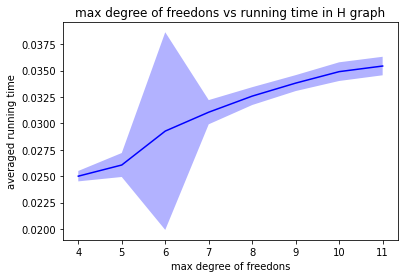

In [105]:
draw_save_fig(folder_path1='outputs20220608', data_type='H',idx=2, data_range=0, save_fig=False, nums=[20])